<a href="https://colab.research.google.com/github/Jaaaaaaaaaaaaay/Gamedev/blob/main/Datamin_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/tutoring_data.csv')
df

,User_ID,Age_in_Months,Gender,Location,Grade,Logins_per_Month,Days_Completed_Activity,Exercises_Started,Total_Time_Spent_in_Minutes,Course_Name,...,Recommendation_Likelihood,Exercises_Completed,Points_Earned,Subscription_Tier,Subscription_Cost,Subscription_Length_in_Months,Renewal_Status,Tutoring,Referrals,Academic_Grade
0,654b113d-4ce4-41a9-a8f4-7f1419419230,156,Other,"Smithchester, VA",8th Grade,6,5,9.784359,107.889381,Chemistry,...,3,7,1910.292936,Free,0.00,4,Yes,Yes,0,D
1,2a044973-1d29-4b2f-83f6-c488290140bb,202,Female,"Beckside, FL",10th Grade,6,6,9.000000,198.865171,Web Development,...,4,9,1698.767255,Free,0.00,1,Yes,No,0,F
2,d84bb18b-bd77-4be9-98bb-a0993b95af75,173,Other,"New Deborahborough, SD",9th Grade,7,4,12.159345,232.639784,Geometry,...,4,10,1860.295769,Premium,9.99,13,Yes,No,0,D
3,411cebf6-18cc-4846-89c7-f3f7bcaede01,199,Female,"West Stephanie, KY",12th Grade,17,17,28.000000,506.644691,Pre-Calculus,...,3,28,4465.824908,Basic,5.99,11,Yes,No,1,F
4,e4ada708-10b6-4fcd-ac08-a83152658751,148,Female,"West Roberthaven, LA",7th Grade,10,8,15.458939,305.275706,Java Programming,...,4,17,2499.211664,Premium,9.99,12,Yes,No,0,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14838,b1eb5f54-5f16-4232-a120-7ab791921591,214,Male,"Ramseyborough, PW",12th Grade,13,14,31.154402,710.385561,Environmental Science,...,5,23,3240.208453,Free,0.00,1,Yes,Yes,0,D
14839,a441aab6-fc84-4c46-9c63-e06c9455cca1,127,Male,"Glennport, MP",6th Grade,7,7,20.724994,367.768263,Web Development,...,3,12,2173.623984,Basic,5.99,7,Yes,Yes,0,C
14840,46336715-24a9-4982-ae5e-42015a2b033e,204,Other,"Port Timothychester, NV",10th Grade,13,13,23.000000,505.984111,Pre-Calculus,...,4,23,3430.860009,Free,0.00,1,Yes,No,1,D
14841,b6780162-5033-4ab2-8c78-6bce7446b871,182,Male,"Port Brianview, OH",10th Grade,7,9,20.679306,409.490339,Calculus,...,4,13,2486.069547,Basic,5.99,5,Yes,No,0,F


In [ ]:
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14843 entries, 0 to 14842
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   User_ID                        14843 non-null  object 
 1   Age_in_Months                  14843 non-null  int64  
 2   Gender                         14843 non-null  object 
 3   Location                       14843 non-null  object 
 4   Grade                          14843 non-null  object 
 5   Logins_per_Month               14843 non-null  int64  
 6   Days_Completed_Activity        14843 non-null  int64  
 7   Exercises_Started              14843 non-null  float64
 8   Total_Time_Spent_in_Minutes    14843 non-null  float64
 9   Course_Name                    14843 non-null  object 
 10  Course_Category                14843 non-null  object 
 11  Completion_Rate                14843 non-null  float64
 12  Average_Score                  14843 non-null 

In [ ]:
df.isnull().sum()

,0
User_ID,0
Age_in_Months,0
Gender,0
Location,0
Grade,0
Logins_per_Month,0
Days_Completed_Activity,0
Exercises_Started,0
Total_Time_Spent_in_Minutes,0
Course_Name,0


In [ ]:
for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature User_ID :14843
The number of values for feature Age_in_Months :103
The number of values for feature Gender :3 -- ['Female' 'Male' 'Other']
The number of values for feature Location :14710
The number of values for feature Grade :7 -- ['10th Grade' '11th Grade' '12th Grade' '6th Grade' '7th Grade'
 '8th Grade' '9th Grade']
The number of values for feature Logins_per_Month :23
The number of values for feature Days_Completed_Activity :25
The number of values for feature Exercises_Started :11789
The number of values for feature Total_Time_Spent_in_Minutes :14374
The number of values for feature Course_Name :14
The number of values for feature Course_Category :3 -- ['Math' 'Programming' 'Science']
The number of values for feature Completion_Rate :14843
The number of values for feature Average_Score :14843
The number of values for feature Course_Rating :3 -- [3 4 5]
The number of values for feature Recommendation_Likelihood :4 -- [2 3 4 5]
The number of values

In [ ]:
df.columns

Index(['User_ID', 'Age_in_Months', 'Gender', 'Location', 'Grade',
       'Logins_per_Month', 'Days_Completed_Activity', 'Exercises_Started',
       'Total_Time_Spent_in_Minutes', 'Course_Name', 'Course_Category',
       'Completion_Rate', 'Average_Score', 'Course_Rating',
       'Recommendation_Likelihood', 'Exercises_Completed', 'Points_Earned',
       'Subscription_Tier', 'Subscription_Cost',
       'Subscription_Length_in_Months', 'Renewal_Status', 'Tutoring',
       'Referrals', 'Academic_Grade'],
      dtype='object')

In [ ]:
df.drop(['User_ID'], axis=1, inplace=True)

In [ ]:
target_column = "Academic_Grade"
features = df.drop(columns=[target_column])
target = df[target_column]

In [ ]:
encoder = LabelEncoder()
target_encoded = encoder.fit_transform(target)

In [ ]:
categorical_features = features.select_dtypes(include=['object', 'category']).columns
numerical_features = features.select_dtypes(include=[np.number]).columns

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for dense output
encoded_features = encoder.fit_transform(features[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
features_encoded = pd.concat([features[numerical_features], encoded_df], axis=1)


Correlation with Academic Grade:
Age_in_Months                    0.215151
Referrals                        0.013643
Subscription_Length_in_Months   -0.009592
Subscription_Cost               -0.018802
Recommendation_Likelihood       -0.037994
Course_Rating                   -0.070723
Logins_per_Month                -0.459912
Days_Completed_Activity         -0.461984
Points_Earned                   -0.479456
Total_Time_Spent_in_Minutes     -0.487110
Exercises_Completed             -0.488127
Exercises_Started               -0.494954
Completion_Rate                 -0.558160
Average_Score                   -0.659503
dtype: float64


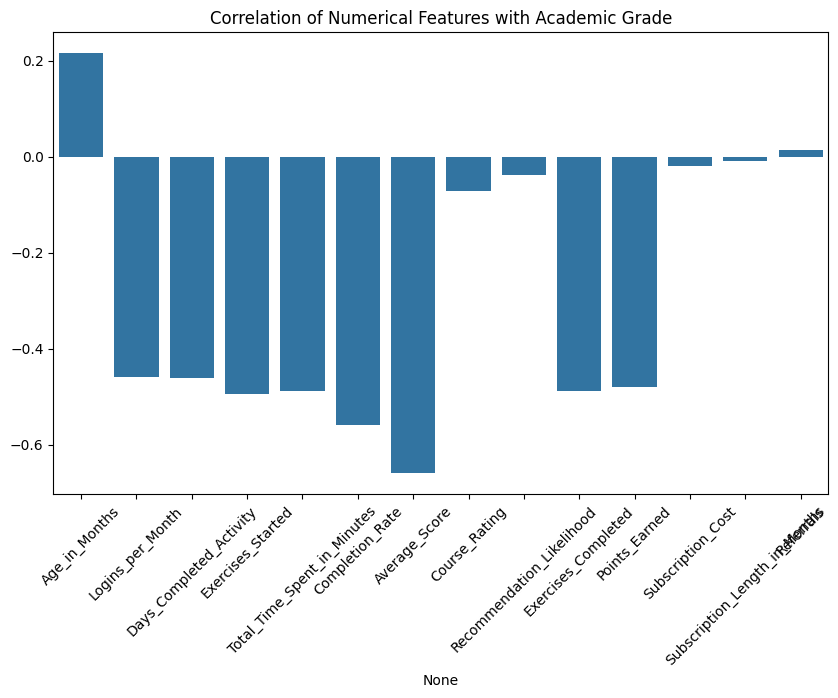

In [ ]:
if len(numerical_features) > 0:
    correlation_matrix = features[numerical_features].corrwith(pd.Series(target_encoded))
    print("\nCorrelation with Academic Grade:")
    print(correlation_matrix.sort_values(ascending=False))

    plt.figure(figsize=(10, 6))
    sns.barplot(x=correlation_matrix.index, y=correlation_matrix.values)
    plt.title("Correlation of Numerical Features with Academic Grade")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
if target.dtype in ['int64', 'float64']:
    mutual_info = mutual_info_regression(features, target_encoded)
else:
    mutual_info = mutual_info_classif(features_encoded, target_encoded)


In [ ]:
if target.dtype not in ['int64', 'float64']:
    mutual_info_series = pd.Series(mutual_info, index=features_encoded.columns)
else:
    mutual_info_series = pd.Series(mutual_info, index=features.columns)
mutual_info_series.sort_values(ascending=False, inplace=True)

In [ ]:
print("\nMutual Information Scores:")
print(mutual_info_series)


Mutual Information Scores:
Average_Score                    0.280408
Completion_Rate                  0.200987
Exercises_Started                0.147820
Exercises_Completed              0.137682
Total_Time_Spent_in_Minutes      0.132312
Points_Earned                    0.127603
Days_Completed_Activity          0.119003
Logins_per_Month                 0.115258
Age_in_Months                    0.038686
Subscription_Cost                0.010930
Subscription_Length_in_Months    0.008230
Course_Rating                    0.005795
Recommendation_Likelihood        0.003617
Referrals                        0.000169
dtype: float64


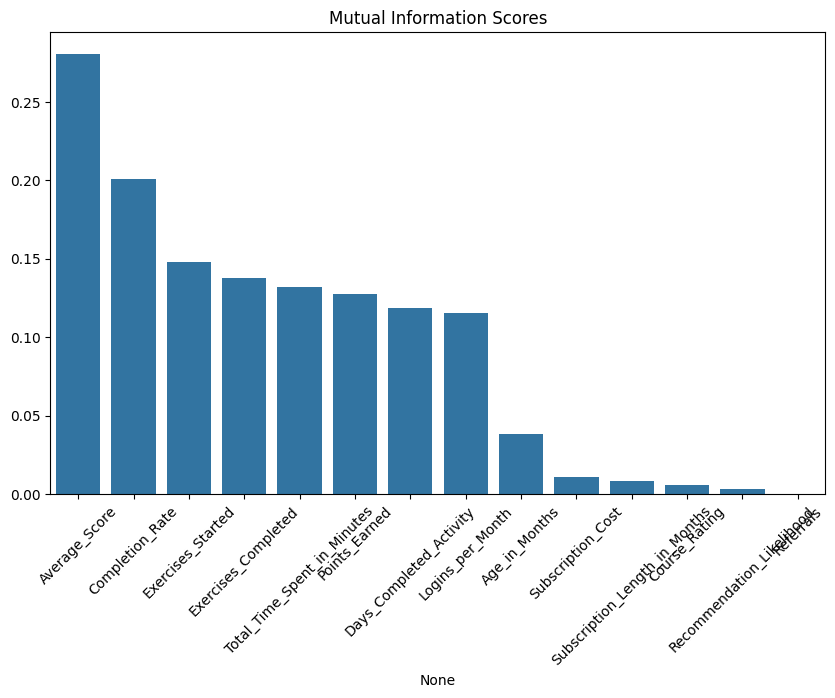

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=mutual_info_series.index, y=mutual_info_series.values)
plt.title("Mutual Information Scores")
plt.xticks(rotation=45)
plt.show()

In [ ]:
best_features = mutual_info_series[mutual_info_series > .10].index.tolist()
print(f"\nTop features selected based on mutual information: {best_features}")


Top features selected based on mutual information: ['Average_Score', 'Completion_Rate', 'Exercises_Started', 'Exercises_Completed', 'Total_Time_Spent_in_Minutes', 'Points_Earned', 'Days_Completed_Activity', 'Logins_per_Month']


In [ ]:
feature_columns = ['Average_Score', 'Completion_Rate', 'Exercises_Started', 'Exercises_Completed', 'Total_Time_Spent_in_Minutes', 'Points_Earned', 'Days_Completed_Activity', 'Logins_per_Month']

X = df[feature_columns]
y = df[target_column]

In [ ]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(df['Academic_Grade'])

In [ ]:
X_normalized

array([[0.66658923, 0.55675302, 0.23876512, ..., 0.27814526, 0.2       ,
        0.27272727],
       [0.40332516, 0.52554878, 0.21744569, ..., 0.22527727, 0.24      ,
        0.27272727],
       [0.32696137, 0.50993194, 0.30331893, ..., 0.26564914, 0.16      ,
        0.31818182],
       ...,
       [0.52956127, 0.61394487, 0.59797566, ..., 0.65819055, 0.52      ,
        0.59090909],
       [0.3323086 , 0.42629319, 0.53489754, ..., 0.42205288, 0.36      ,
        0.31818182],
       [0.28059605, 0.38956423, 0.27216163, ..., 0.29830316, 0.2       ,
        0.22727273]])

In [ ]:
y_encoded

array([2, 3, 2, ..., 2, 3, 3])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.3, random_state=42)

# **NAIVE BAYES**

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.74

Classification Report:
               precision    recall  f1-score   support

           0       0.15      1.00      0.27         2
           1       0.51      0.60      0.55       275
           2       0.72      0.70      0.71      1979
           3       0.80      0.80      0.80      2197

    accuracy                           0.74      4453
   macro avg       0.55      0.77      0.58      4453
weighted avg       0.74      0.74      0.74      4453



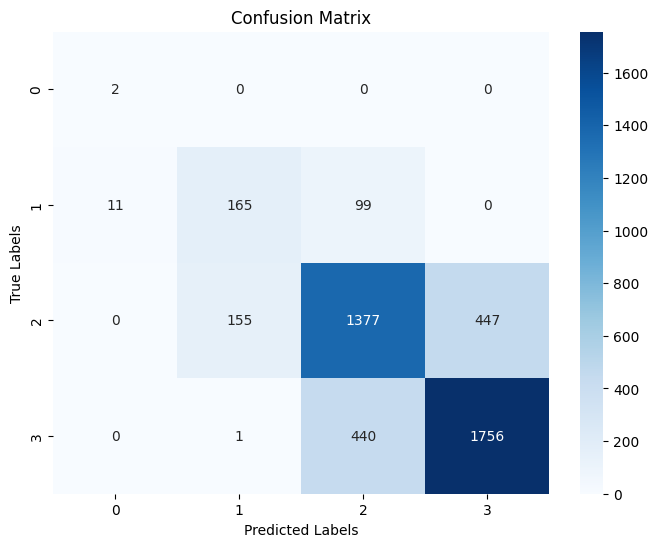

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='weighted')
print(f"AUC: {auc:.2f}")

AUC: 0.86


# **SVM**

In [ ]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.78

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.72      0.46      0.56       275
           2       0.75      0.77      0.76      1979
           3       0.82      0.83      0.82      2197

    accuracy                           0.78      4453
   macro avg       0.57      0.51      0.54      4453
weighted avg       0.78      0.78      0.78      4453



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


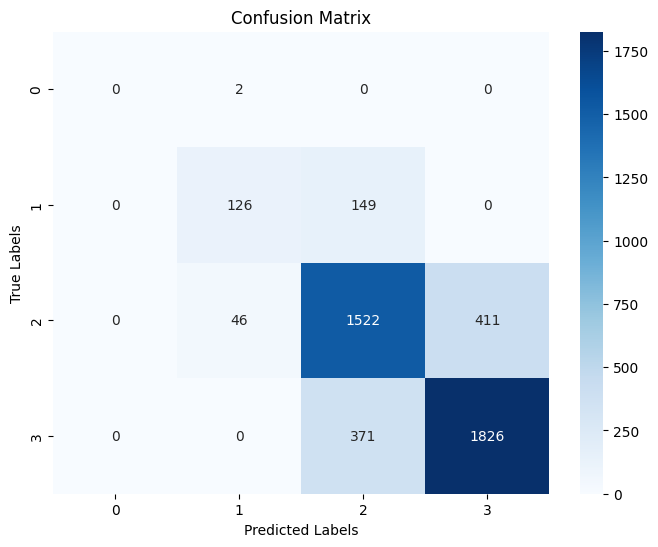

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
auc = roc_auc_score(y_test, svm_model.predict_proba(X_test), multi_class='ovr', average='weighted')
print(f"AUC: {auc:.2f}")

AUC: 0.89


# **LOGISTIC REGRESSION**

In [ ]:
logistic_model = LogisticRegression(max_iter=1000)  # Adjust max_iter for convergence if needed
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = logistic_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.78

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.72      0.46      0.56       275
           2       0.75      0.77      0.76      1979
           3       0.82      0.84      0.83      2197

    accuracy                           0.78      4453
   macro avg       0.57      0.52      0.54      4453
weighted avg       0.78      0.78      0.78      4453



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


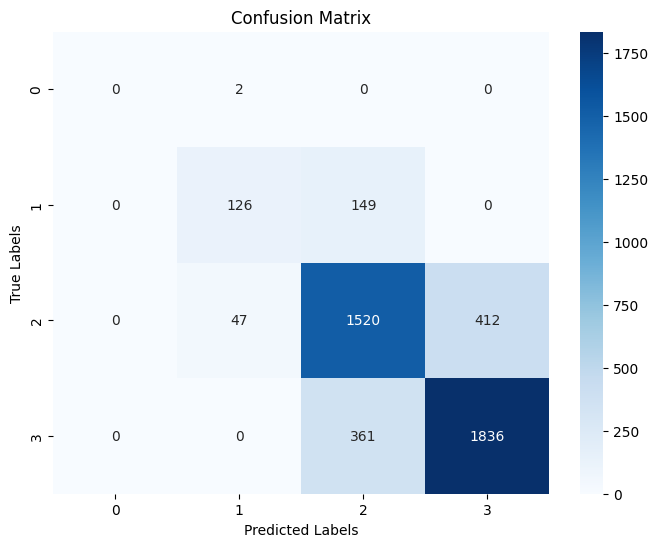

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=logistic_model.classes_, yticklabels=logistic_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_probs = logistic_model.predict_proba(X_test)
auc = roc_auc_score(y_test, y_probs, multi_class='ovr', average='weighted')
print(f"AUC: {auc:.2f}")

AUC: 0.91


# **KNN**

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # p=2 for Euclidean distance
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.74

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.63      0.44      0.52       275
           2       0.71      0.73      0.72      1979
           3       0.79      0.80      0.79      2197

    accuracy                           0.74      4453
   macro avg       0.53      0.49      0.51      4453
weighted avg       0.74      0.74      0.74      4453



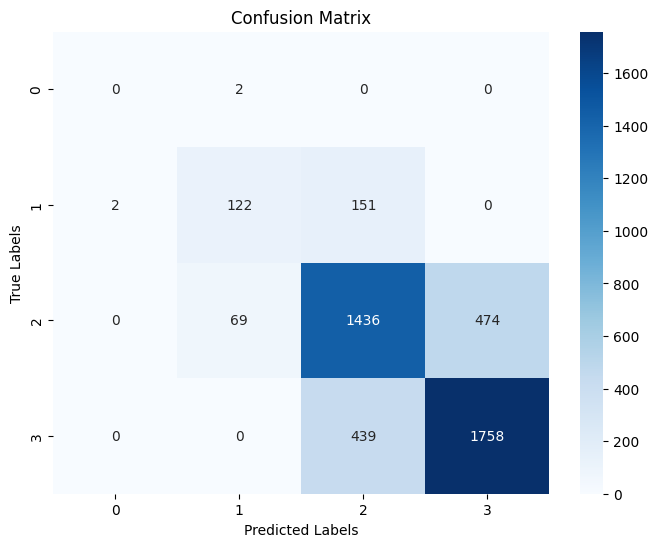

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
auc = roc_auc_score(y_test, knn_model.predict_proba(X_test), multi_class='ovr', average='weighted')
print(f"AUC: {auc:.2f}")

AUC: 0.86


# **Random Forest**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.77

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.67      0.45      0.54       275
           2       0.73      0.76      0.75      1979
           3       0.81      0.82      0.82      2197

    accuracy                           0.77      4453
   macro avg       0.55      0.51      0.52      4453
weighted avg       0.77      0.77      0.77      4453



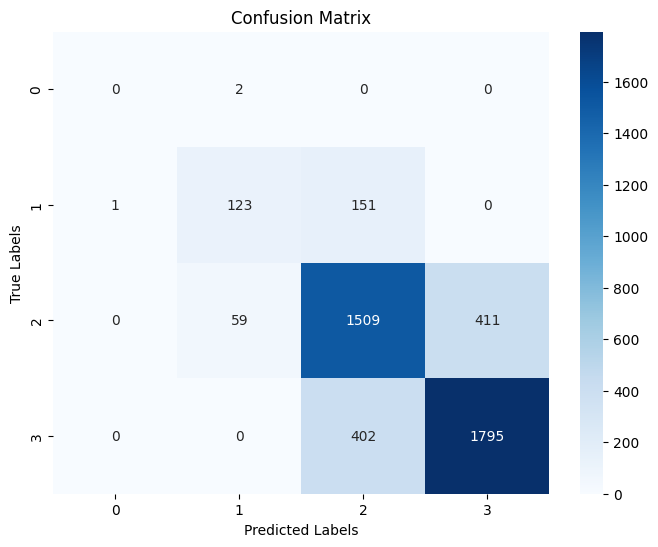

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

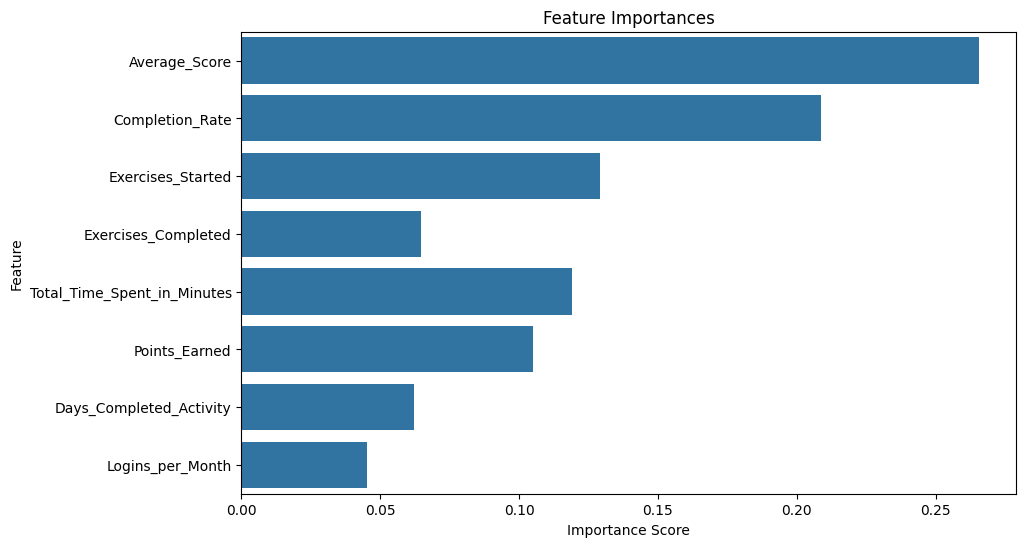

In [ ]:
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_columns)
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [ ]:
auc = roc_auc_score(y_test, rf_model.predict_proba(X_test), multi_class='ovr', average='weighted')
print(f"AUC: {auc:.2f}")

AUC: 0.89


# **NEURAL NETWORK**

In [ ]:
nn_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [ ]:
y_pred = nn_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.79

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.73      0.50      0.59       275
           2       0.76      0.75      0.76      1979
           3       0.81      0.85      0.83      2197

    accuracy                           0.79      4453
   macro avg       0.82      0.65      0.71      4453
weighted avg       0.78      0.79      0.78      4453



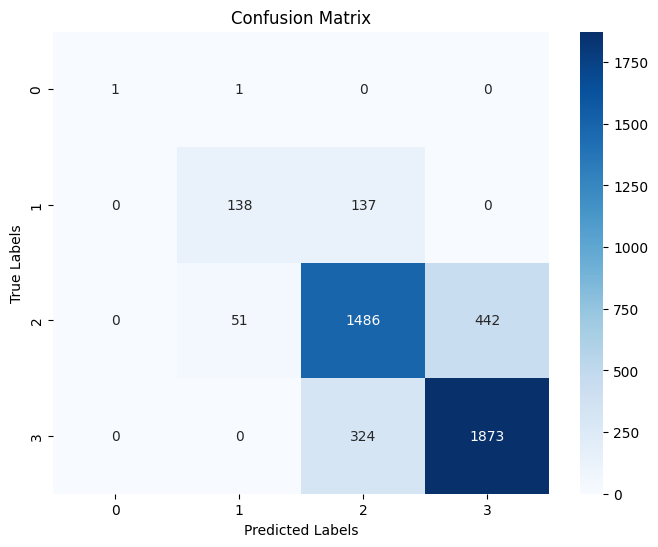

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=nn_model.classes_, yticklabels=nn_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
auc = roc_auc_score(y_test, nn_model.predict_proba(X_test), multi_class='ovr', average='weighted')
print(f"AUC: {auc:.2f}")

AUC: 0.91
